**Hierarchical Clustering with Gower's Distance and K-prototypes Clustering**

K-prototypes is a clustering algorithm that can handle mixed data types, i.e., both numerical and categorical variables. It is a combination of K-means and K-modes algorithms. On the other hand, Hierarchical clustering with Gower's distance is another clustering algorithm that can handle both numerical and categorical data by computing Gower's distance. It is a distance-based approach and uses a hierarchical clustering method to group similar data points into clusters. Both algorithms are useful when dealing with datasets that have a mix of numerical and categorical variables.

Steps:
1. Import/install the necessary packages.
2. Retrieve the data from Google Drive.
3. Normalise the numerical data.
4. One-hot encode the categorical data.
5. Fit the hierarchical clustering model.
6. Display the dendrogram.
7. Obtain the cluster labels using fcluster.
8. Apply the K-prototypes model.
9. Display the cost curve.
10. Print cluster statistics and display box plots grouped by cluster.
11. Compare the clusters for each numerical feature.
12. Compare the clusters for each categorical feature.

**Import/install the necessary packages**

In [1]:
!pip install gower
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import cdist
from gower import gower_matrix
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from kmodes.kprototypes import KPrototypes

**Retrieve the data from Google Drive**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/Customer_Cluster_Data.csv") 
print(df.info(),'\n')
print(df.head(),'\n')
print(df.describe(),'\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                1000 non-null   object 
 1   Marital Status        1000 non-null   object 
 2   Education             1000 non-null   object 
 3   Employment Status     1000 non-null   object 
 4   Housing               1000 non-null   object 
 5   Age                   1000 non-null   int64  
 6   Income                1000 non-null   int64  
 7   Credit Score          1000 non-null   int64  
 8   Debt-to-Income Ratio  1000 non-null   float64
 9   Savings               1000 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 78.2+ KB
None 

   Gender Marital Status        Education   Employment Status Housing  Age  \
0    Male       Divorced      High School  Employed Part-time    Rent   53   
1    Male         Single              PhD       Self-emp

**Separate the numerical and categorical columns**

In [4]:
numerical_cols = ['Age', 'Income', 'Credit Score', 'Debt-to-Income Ratio', 'Savings']
categorical_cols = ['Gender', 'Marital Status', 'Education', 'Employment Status', 'Housing']

**Normalise the numerical data**

In [5]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

**One-hot encode the categorical data**

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_cols]).toarray())
encoded_df.columns = encoder.get_feature_names_out(categorical_cols)

**Concatenate the scaled numerical data and encoded categorical data**

In [7]:
combined_df = pd.concat([scaled_df, encoded_df], axis=1)

**Compute the Gower's distance matrix**

In [8]:
gower_dist = gower_matrix(combined_df.values)

**Fit the hierarchical clustering model**

In [9]:
clustering = linkage(gower_dist, method='complete')

<ipython-input-9-e02a25cb7ee4>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clustering = linkage(gower_dist, method='complete')


**Display the dendrogram**

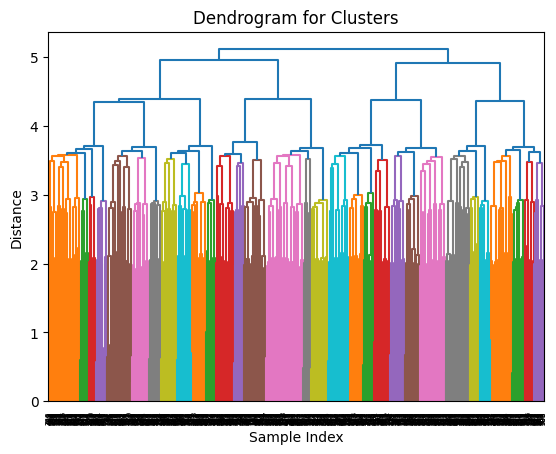

In [10]:
dendrogram(clustering, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Clusters')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

**Obtain the cluster labels using fcluster**

In [11]:
n_clusters = 9
labels = fcluster(clustering, t=n_clusters, criterion='maxclust')
print(labels)

[9 9 4 7 4 9 1 5 5 8 5 9 3 4 1 5 3 1 8 4 3 9 1 7 4 8 7 9 7 3 4 4 5 4 4 5 6
 4 3 6 9 7 3 7 6 5 5 4 9 8 7 8 8 3 8 1 6 8 9 1 5 9 2 1 8 6 8 4 3 4 4 3 7 4
 8 2 3 8 8 3 2 2 7 7 4 5 1 1 6 8 4 9 9 6 6 4 7 5 3 7 5 6 8 3 2 6 8 1 9 3 9
 6 6 8 8 9 4 4 3 3 6 5 3 1 1 4 6 7 7 5 6 6 2 1 9 4 6 3 4 6 9 6 8 3 1 3 5 7
 6 9 9 8 7 3 4 8 1 5 6 3 6 6 4 3 7 6 2 3 9 4 1 9 9 1 5 9 9 6 1 3 6 7 7 7 7
 3 3 7 9 2 8 8 2 5 3 7 3 7 1 5 9 3 1 5 5 4 4 4 1 7 6 8 4 3 3 8 5 8 8 4 2 4
 8 2 9 8 6 7 8 8 2 9 5 2 7 7 1 6 9 3 2 5 3 7 5 3 8 4 9 5 1 5 8 8 3 9 1 9 9
 2 1 6 5 8 7 3 1 8 8 7 7 3 6 4 2 5 9 5 4 5 2 7 3 2 6 2 7 3 2 6 4 4 6 6 3 7
 1 9 7 4 3 5 2 1 8 2 2 9 1 2 2 8 1 9 3 4 8 3 1 5 7 6 1 9 5 5 9 4 9 9 1 2 5
 1 4 6 7 4 5 2 9 8 3 2 3 1 7 8 4 3 6 2 8 4 7 9 3 4 6 8 2 9 6 4 9 8 4 8 5 5
 5 9 6 3 2 9 4 4 5 8 6 6 5 9 8 2 5 5 9 5 6 4 1 2 7 3 1 7 3 6 7 4 7 3 1 2 5
 3 2 7 1 6 5 9 7 4 8 8 3 1 9 9 7 4 6 9 4 9 5 4 7 5 3 6 5 4 4 9 5 5 2 5 2 9
 7 6 5 5 4 9 2 3 2 1 5 9 2 2 4 4 5 4 2 8 5 7 6 1 6 9 6 4 9 5 1 4 9 1 3 4 2
 5 9 9 5 1 1 2 4 9 3 8 6 

**Apply the K-prototypes model**

In [12]:
# Fit the K-prototypes model
kproto = KPrototypes(n_clusters=9, init='Cao', n_init=5, verbose=2)
clusters = kproto.fit_predict(combined_df.values, categorical=[5,6,7,8,9])

# Print the cluster labels
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 395, ncost: 5675.623160956527
Run: 1, iteration: 2/100, moves: 134, ncost: 5612.63353122673
Run: 1, iteration: 3/100, moves: 85, ncost: 5577.940706080569
Run: 1, iteration: 4/100, moves: 55, ncost: 5560.347529249631
Run: 1, iteration: 5/100, moves: 34, ncost: 5550.677328156481
Run: 1, iteration: 6/100, moves: 33, ncost: 5542.142254797823
Run: 1, iteration: 7/100, moves: 21, ncost: 5536.762281504855
Run: 1, iteration: 8/100, moves: 34, ncost: 5526.372968963276
Run: 1, iteration: 9/100, moves: 19, ncost: 5520.529823924121
Run: 1, iteration: 10/100, moves: 28, ncost: 5513.262309305218
Run: 1, iteration: 11/100, moves: 24, ncost: 5506.80076122085
Run: 1, iteration: 12/100, moves: 21, ncost: 5500.832854632451
Run: 1, iteration: 13/100, moves: 25, ncost: 5490.295523039549
Run: 1, iteration: 14/100, moves: 

**Display the cost curve**

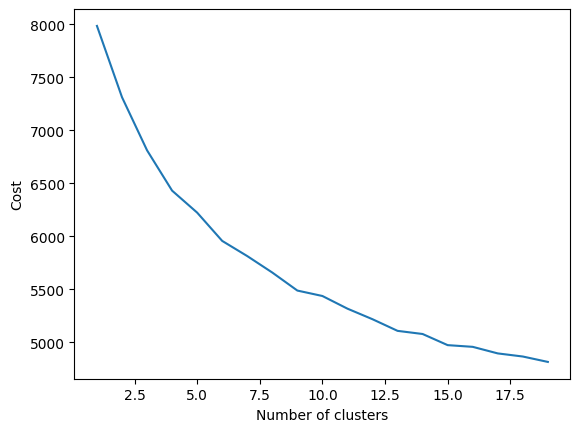

In [13]:
cost = []

for num_clusters in range(1, 20):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=1, verbose=0)
    kproto.fit(combined_df.values, categorical=[5,6,7,8,9])
    cost.append(kproto.cost_)

# Plot the cost function
plt.plot(range(1, 20), cost)
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

**Print cluster statistics and display box plots grouped by cluster**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                1000 non-null   object 
 1   Marital Status        1000 non-null   object 
 2   Education             1000 non-null   object 
 3   Employment Status     1000 non-null   object 
 4   Housing               1000 non-null   object 
 5   Age                   1000 non-null   int64  
 6   Income                1000 non-null   int64  
 7   Credit Score          1000 non-null   int64  
 8   Debt-to-Income Ratio  1000 non-null   float64
 9   Savings               1000 non-null   int64  
 10  cluster               1000 non-null   int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 82.2+ KB
None 

   Gender Marital Status        Education   Employment Status Housing  Age  \
0    Male       Divorced      High School  Employed Part-time    Rent   5

cluster
1    Axes(0.125,0.11;0.775x0.77)
2    Axes(0.125,0.11;0.775x0.77)
3    Axes(0.125,0.11;0.775x0.77)
4    Axes(0.125,0.11;0.775x0.77)
5    Axes(0.125,0.11;0.775x0.77)
6    Axes(0.125,0.11;0.775x0.77)
7    Axes(0.125,0.11;0.775x0.77)
8    Axes(0.125,0.11;0.775x0.77)
9    Axes(0.125,0.11;0.775x0.77)
dtype: object

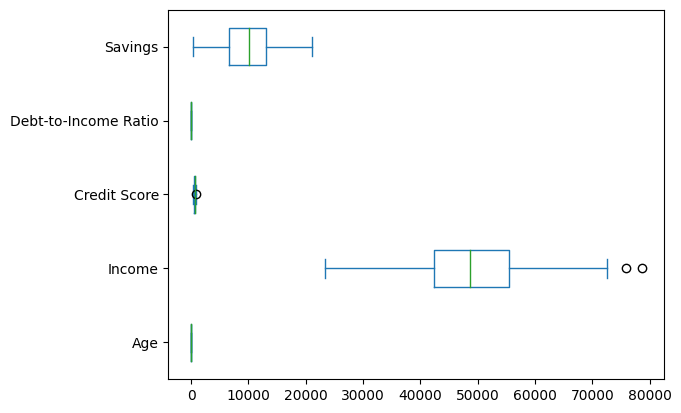

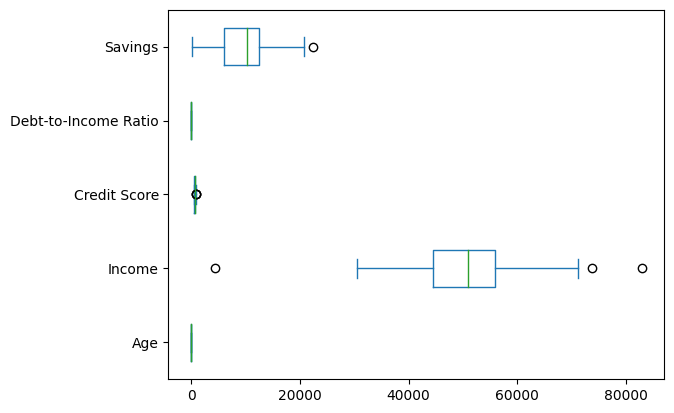

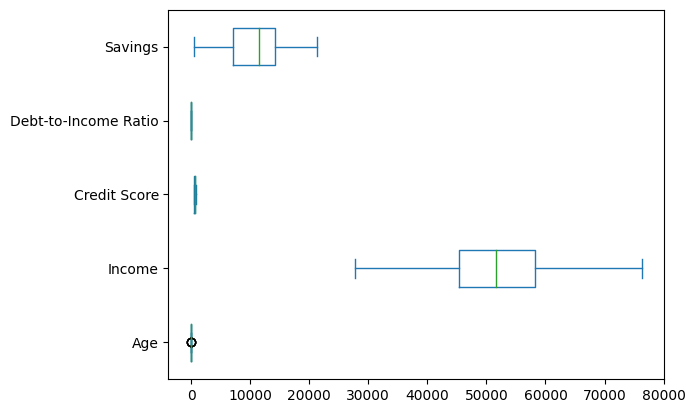

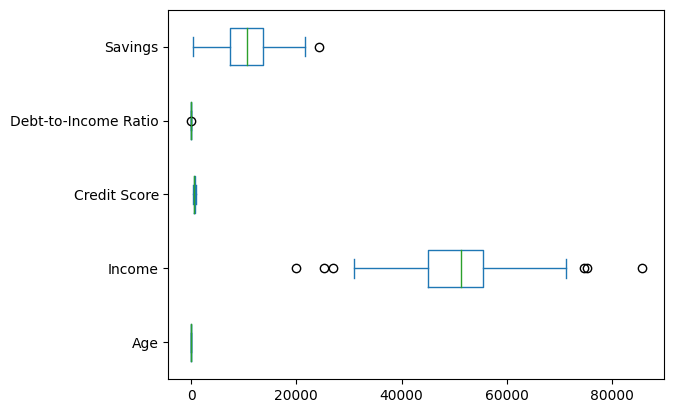

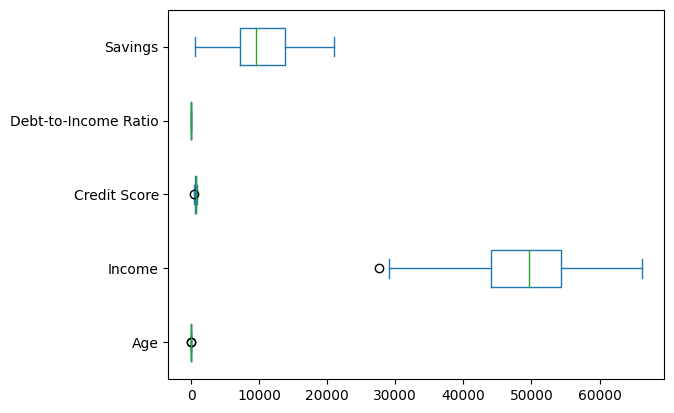

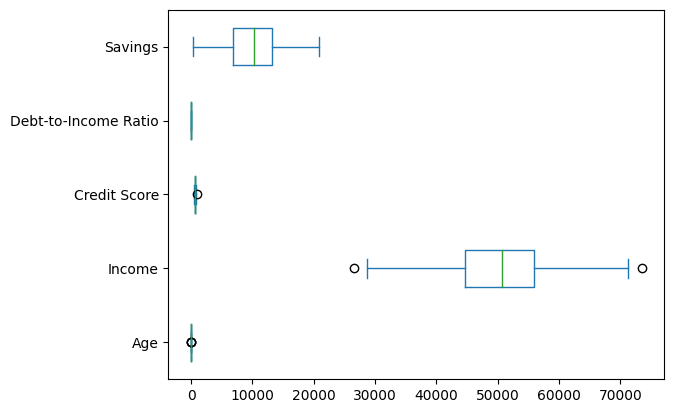

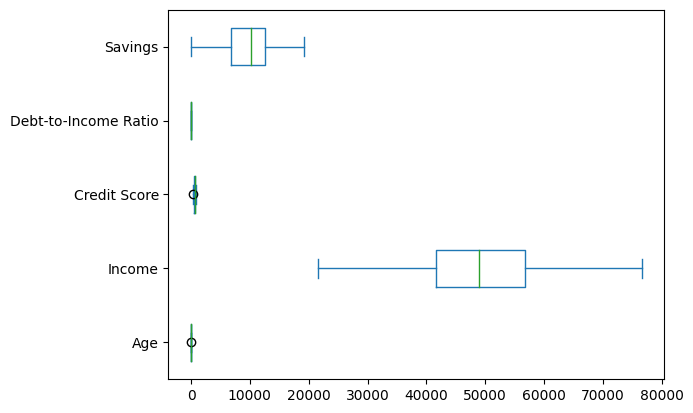

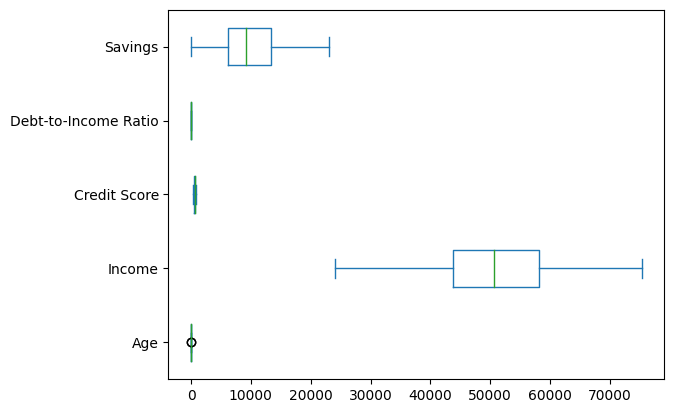

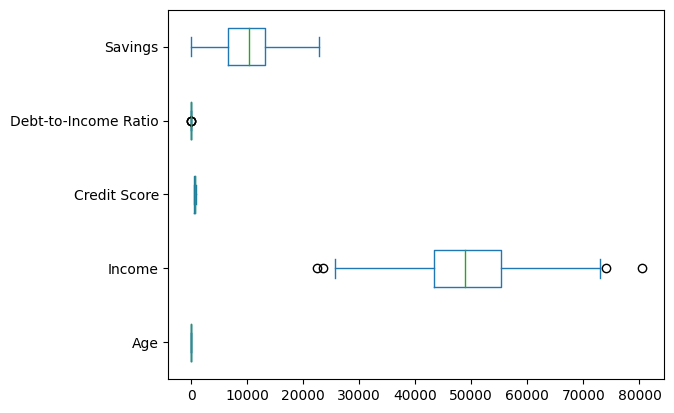

In [14]:
df['cluster'] = labels # add cluster labels to dataframe
print(df.info(),'\n')
print(df.head(),'\n')
print(df.groupby('cluster').mean())
print(df.groupby('cluster').describe())
df.groupby('cluster')[numerical_cols].plot.box(vert=False)

**Compare the clusters for each numerical feature**

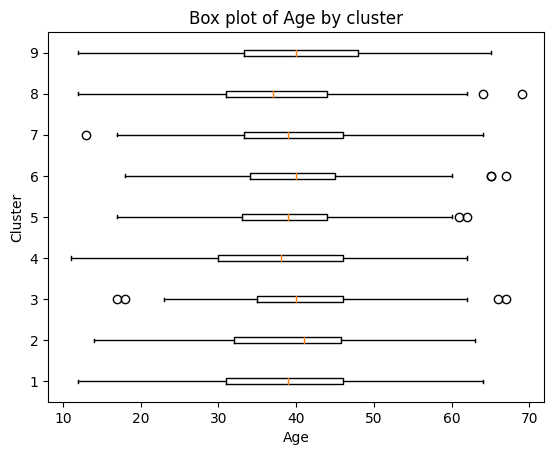

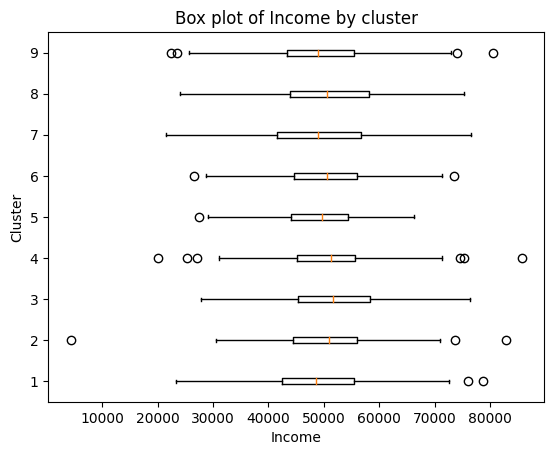

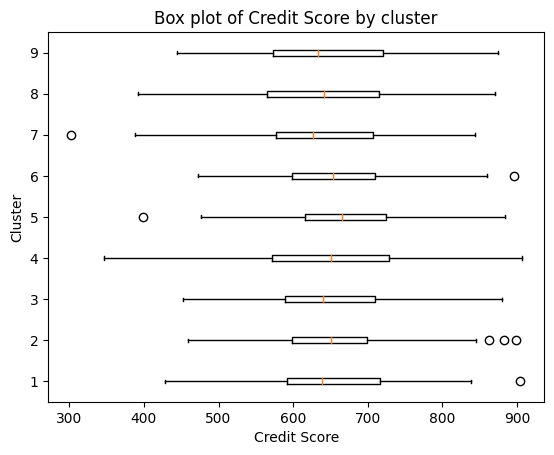

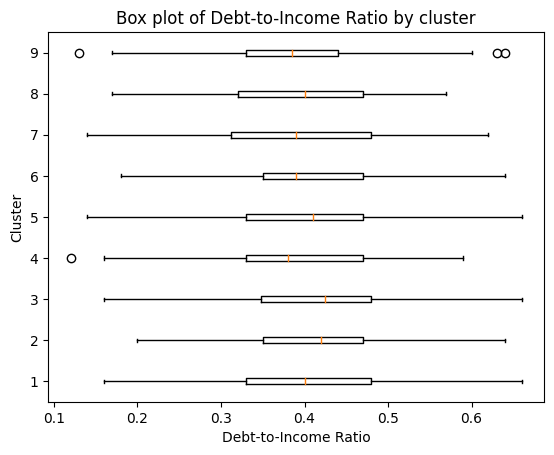

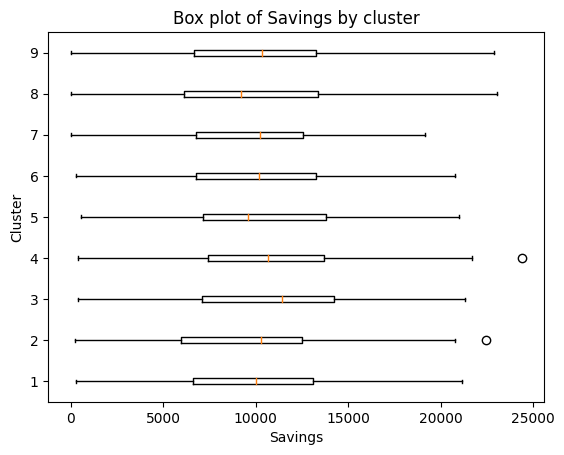

In [15]:
clusters = df['cluster'].unique() # unique cluster values in the 'cluster' column

for col in numerical_cols:
    fig, ax = plt.subplots()
    for cluster in clusters:
        cluster_df = df[df['cluster'] == cluster]
        ax.boxplot(cluster_df[col], positions=[cluster], vert=False)
    ax.set_yticklabels(clusters)
    ax.set_xlabel(col)
    ax.set_ylabel('Cluster')
    ax.set_title(f'Box plot of {col} by cluster')
    plt.show()


**Compare the clusters for each categorical feature**

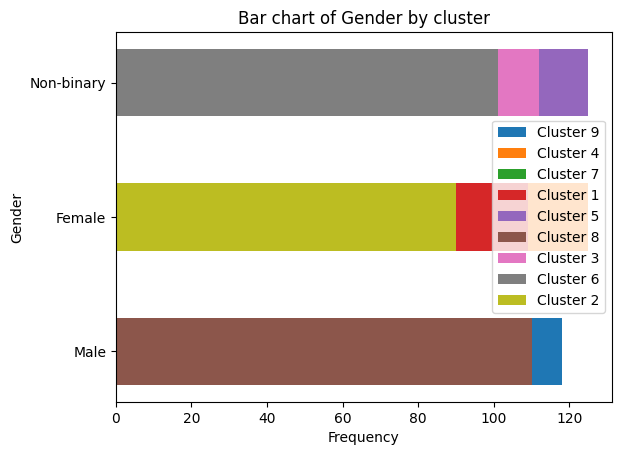

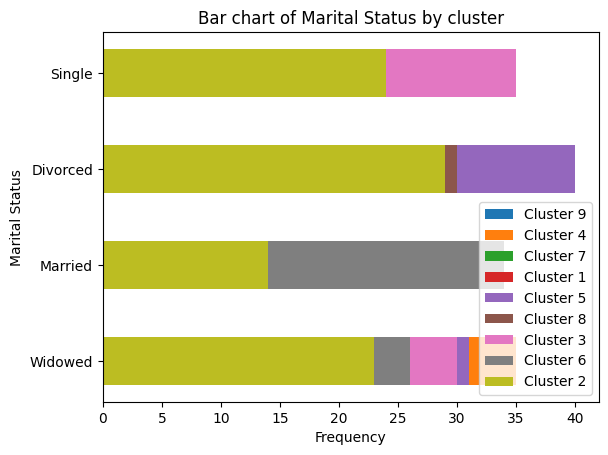

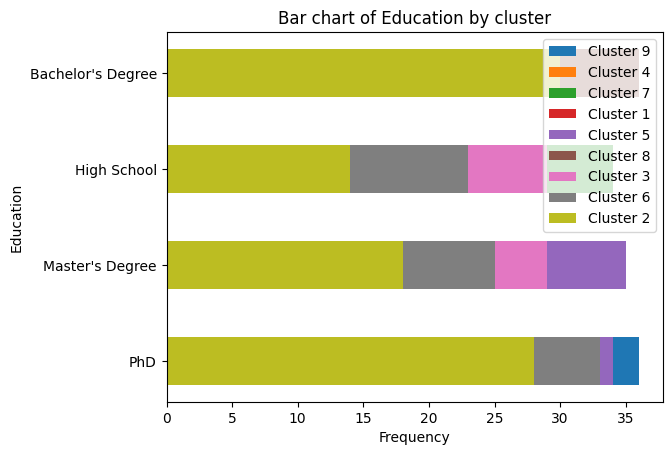

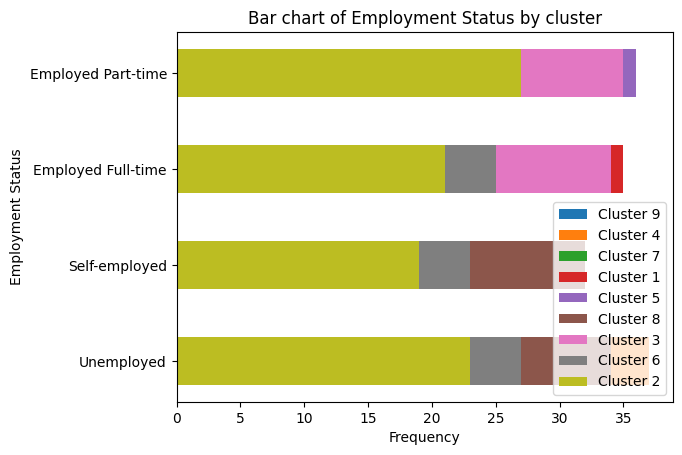

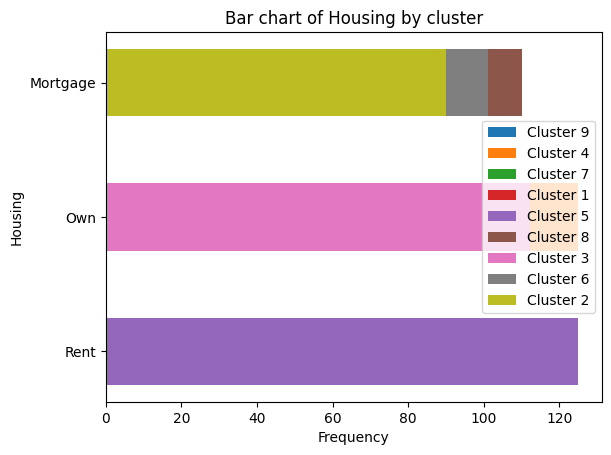

In [16]:
for col in categorical_cols:
    fig, ax = plt.subplots()
    for cluster in clusters:
        cluster_df = df[df['cluster'] == cluster]
        counts = cluster_df[col].value_counts()
        ax.barh(counts.index, counts.values, height=0.5, label=f'Cluster {cluster}')
        #ax.legend(bbox_to_anchor=(2, 1), loc='upper right')
         

    ax.set_xlabel('Frequency')
    ax.set_ylabel(col)
    ax.set_title(f'Bar chart of {col} by cluster')
    ax.legend()
    plt.show()